<a href="https://colab.research.google.com/github/blkdigiarchivist/blkdigiarchivist/blob/main/Turner_Lauren_Final_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examining The *New York Times* Fiction Bestseller List

Lauren Turner

LIS 4235: Scripting for Large Databases

University of Denver

Peter Organisciak

# Introduction

The implications of a title featured on a bestseller list often include being incredibly well-written, heavily read and reviewed, mass produced, and notably recognized. From the fame of the author to how revolutionary the content was at the time, the historical picture painted by American bestseller lists has been documented and analyzed thrice over.

Previous studies into the gender inequality of bestseller lists (Verboord, 2012), the cultural politics associated with certain titles on the bestseller list (Prado, 2021), and detailed histories of what it meant to be an early 'bestseller' (McCraken, 1998), have all offered relevant perspectives on what it means to be on a bestseller list. But not much of this research has been on a surface level to investigate small trends in representation, repetition, and race.


## Scope

The investigation that follows comes from an interest in the trends within American popular fiction. When examining how popular fiction represents actual historical opinions and experiences, inconsistencies arise. This study corroborates that disconnect, specifically when it comes to common bestseller lists and what image of history they depict. Recent conversations about the connection between bestseller lists and the cultural climate of the readers, have also contributed to this research project. As stated in the introduction, this project will attempt to look at the data as a whole, instead of looking for broad statements about cultural implications.

Once again it may be useful to mention that because it is known that generalized lists of bestselling fiction often only pulls from a highly specific group of published works, there will be a gap in the coverage. That is its own problem that we will try not to address in this paper. Instead, let's look at who is included (and not included), how often are they listed, and where the variance is.

Some of the questions that I want to ask include:

*   What titles have been on the bestseller list for the longest?
*   How many titles/authors were only on the bestseller list once?
*   What author has the most titles on the bestseller list overtime?

I am also interested in developing a system to look into the diversity of authors on the list, maybe by finding a list of the top American writers of color and looking into how many have made it on the *NYT* list. In order to get answers about the diversity represented in the *NYT* list, I will create indexes and plot the timeline associated with key BIPOC authors as recognized by other secondary sources. Prior to identifying a reputable list, I hypothesized that the following lists would make an appearance or make up most of that list. Those authors included:

*   Toni Morrison
*   Octavia Butler
*   Roxanne Gay
*   James Baldwin
*   Michelle Obama
*   Brit Bennett

To corroborate my list, I referenced lists from *Biography.com* (2021) and *PBS* (2013) outlining the most prolific African American writers of all time. The overlap among the two lists can be seen below:

*   Maya Angelou
*   Zora Neale Hurston
*   Chinua Achebe
*   Langston Hughes
*   Alex Haley
*   Michelle Obama
*   Alice Walker
*   James Baldwin
*   Terry McMillian
*   Amiri Baraka
*   Octavia Butler
*   W.E.B. DuBois
*   Ralph Ellison
*   Richard Wright

## Data

To get a national picture that is highly recognized and utilized, I turned to The *New York Times* list of bestselling hardcover fiction. The dataset is made available by the Post45 Data Collective and spans over 91 years, between 1931 and 2020. Consisting of semi-cleaned data including over 60,000 unique records and six columns, there is ample material for examination although some grouping will be required for ease of use.


Collected by Jordan Pruett, the dataset comes with two additional tables that will not be used in this project. The author also put together a curatorial statement which again recommends not using the data to make historical or cultural conclusions (3). The dataset that will be the focus of this project includes columns for the year of appearance, week of the issue, the book's rank, a unique title_id, the title and the authors name, both of which were provided by the *New York Times*.

#Uploading the data

The data can be viewed on Past45's page using an in-browser viewer.

https://doi.org/10.18737/CNJV1733p4520210415

As designated by this assignment, I am using Colab to upload and analyze the data. Based in Python, the analysis will utilize the pandas, matplotlib, and numpy packages. Below you can see the steps taken to upload the data using the read_csv function. I then did a general info search to make sure that the column names and datatypes were correct.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nyt = pd.read_csv(r'/content/updated_nyt_full.csv')
# nyt = nyt[['year', 'week', 'rank', 'title_id', 'title', 'author']]
print(nyt)

In [ ]:
nyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60386 entries, 0 to 60385
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      60386 non-null  int64 
 1   week      60386 non-null  object
 2   rank      60386 non-null  int64 
 3   title_id  60386 non-null  int64 
 4   title     60386 non-null  object
 5   author    60376 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


##Quick summary of the data

Now that the data is uploaded, I wanted to start by running a few scripts to get some preliminary information about the dataset. One of my main queries was about which author and title were on the list the most amount of times. To answer both of these questions, I can do the following script to identify the top 50 authors and titles. I made each series into a dataframe for analysis later.

In [ ]:
topauthors = nyt['author'].value_counts().iloc[:50]
print(topauthors)

Danielle Steel             957
Stephen King               892
John Grisham               789
Taylor Caldwell            524
James A. Michener          477
Robert Ludlum              406
Leon Uris                  405
Mary Higgins Clark         403
David Baldacci             396
Nicholas Sparks            390
Tom Clancy                 388
Herman Wouk                375
James Patterson            357
John le Carré              344
Sidney Sheldon             340
Irving Stone               325
Ken Follett                325
Helen MacInnes             307
Mary Stewart               294
Dan Brown                  287
Harold Robbins             285
Frances Parkinson Keyes    281
Daphne du Maurier          275
John O'Hara                273
Michael Crichton           266
Allen Drury                258
Dean Koontz                246
Thomas B. Costain          243
Lawrence Sanders           237
Pearl S. Buck              236
Gore Vidal                 235
Irving Wallace             233
Frederic

In [ ]:
topauthors = pd.DataFrame(topauthors)
topauthors

,author
Danielle Steel,957
Stephen King,892
John Grisham,789
Taylor Caldwell,524
James A. Michener,477
Robert Ludlum,406
Leon Uris,405
Mary Higgins Clark,403
David Baldacci,396
Nicholas Sparks,390


In [ ]:
toptitles = nyt['title'].value_counts().iloc[:50]
print(toptitles)

OH, THE PLACES YOU'LL GO!                178
THE CELESTINE PROPHECY                   165
THE DA VINCI CODE                        165
THE BRIDGES OF MADISON COUNTY            164
ALL THE LIGHT WE CANNOT SEE              132
THE CAINE MUTINY                         123
WHERE THE CRAWDADS SING                  114
AUNTIE MAME                              112
THE ROBE                                 111
THE HELP                                 108
ADVISE AND CONSENT                       102
THE FIVE PEOPLE YOU MEET IN HEAVEN       100
TO KILL A MOCKINGBIRD                     98
HAWAII                                    94
ANTHONY ADVERSE                           86
A DANCE WITH DRAGONS                      86
THE AGONY AND THE ECSTASY                 83
HARRY POTTER AND THE SORCERER'S STONE     82
ILLUSIONS                                 80
GONE GIRL                                 80
THE NIGHTINGALE                           80
NOT AS A STRANGER                         79
THE GIRL W

In [ ]:
toptitles = pd.DataFrame(toptitles)
toptitles

,title
"OH, THE PLACES YOU'LL GO!",178
THE CELESTINE PROPHECY,165
THE DA VINCI CODE,165
THE BRIDGES OF MADISON COUNTY,164
ALL THE LIGHT WE CANNOT SEE,132
THE CAINE MUTINY,123
WHERE THE CRAWDADS SING,114
AUNTIE MAME,112
THE ROBE,111
THE HELP,108


##Visualization

Using a plot to visualize the frequency of titles each year is also helpful in getting a broad picture of distribution of data overtime.

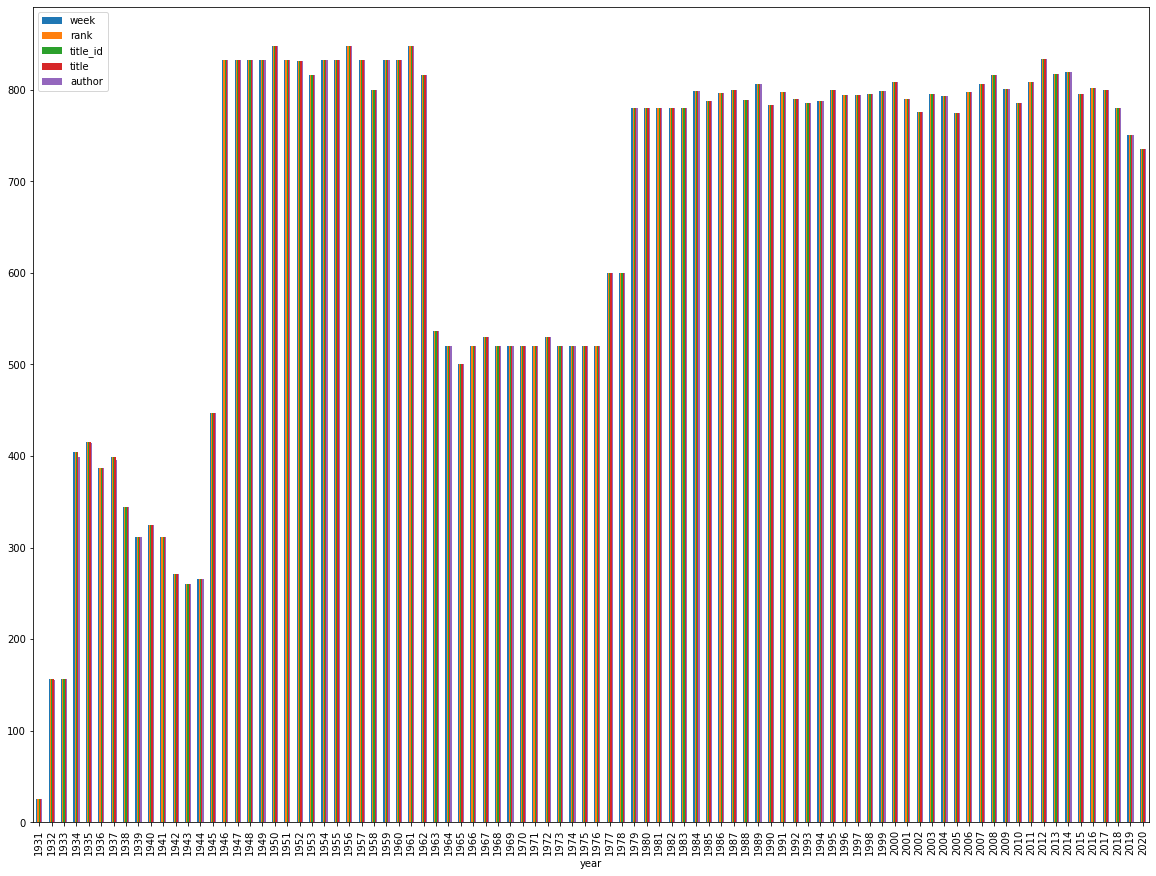

In [ ]:
result = nyt.groupby(['year'])
result.count().plot.bar(figsize=(20,15))

What this simple bar graph shows is that over time, the frequency has fluctuated over the years, starting low in 1931, spiking a bit around 1934, then again between 1936 and 1961. With another batch of low numbers in the mid 60s and 70s, and then resuming high numbers post 1980, it would seem that the number of bestselling titles and authors has increased with time. This could be due to the frequency at which the list is created or the increase in writers and publishing houses.

# Where do Black authors stand?

When thinking about my other questions for this project, I wanted to source the titles, weeks, ranks, and years associated with the list of Black authors that I earlier mentioned. I attempted to create a list and search for that list of names in the author column, but found it difficult to navigate. Instead, I create a dataframe for each author and examined them individually.

In [ ]:
# Out of the lists of Black author names listed in the introduction, there are authors with actual titles on the list:
# Toni Morrison
toni_morrison = nyt[nyt['author'] == ('Toni Morrison')]
toni_morrison
# James Baldwin
james_baldwin = nyt[nyt['author'] == ('James Baldwin')]
james_baldwin
# Maya Angelou
maya = nyt[nyt['author'] == ('Maya Angelou')]
maya
# Brit Bennett
brit_bennett = nyt[nyt['author'] == ('Brit Bennett')]
brit_bennett
# Alice Walker
alice_walker = nyt[nyt['author'] == ('Alice Walker')]
alice_walker
# Terry McMillian
terry = nyt[nyt['author'] == ('Terry McMillan')]
terry
# Ralph Ellison
ralph_ellison = nyt[nyt['author'] == ('Ralph Ellison')]
ralph_ellison
# Richard Wright
richard_wright = nyt[nyt['author'] == ('Richard Wright')]
richard_wright

,year,week,rank,title_id,title,author
2663,1940,1940-03-11,4,3169,NATIVE SON,Richard Wright
2666,1940,1940-03-18,1,3169,NATIVE SON,Richard Wright
2673,1940,1940-03-25,2,3169,NATIVE SON,Richard Wright
2679,1940,1940-04-01,2,3169,NATIVE SON,Richard Wright
2685,1940,1940-04-08,2,3169,NATIVE SON,Richard Wright
2691,1940,1940-04-15,2,3169,NATIVE SON,Richard Wright
2699,1940,1940-04-22,4,3169,NATIVE SON,Richard Wright
2707,1940,1940-04-29,5,3169,NATIVE SON,Richard Wright
2713,1940,1940-05-06,5,3169,NATIVE SON,Richard Wright
2719,1940,1940-05-13,5,3169,NATIVE SON,Richard Wright


Of the names that I guessed, the ones that did not find a spot on the list include:


*   Roxanne Gay
*   Michelle Obama
*   Zora Neale Hurston
*   Chinua Achebe
*   Langston Hughes
*   Alex Haley
*   Amiri Baraka
*   Octavia Butler
*   W.E.B. DuBois

What is interesting about their absence is the role that they all played in creating conversations about race, culture, and history over the years. I will discuss these gaps in the conclusion.



# Regular Expressions

When thinking about the titles of common bestsellers, I wanted to examine any patterns in the use of determiners. Words like "The," "A," and "My," are used before nouns and to convey specificity. Although somewhat trivial, I was curiuous about how often they show up in these titles. Using regular expressions was the fastest way to identify titles fitting this group.

In [ ]:
# It was necessary to let Colab know that I was going to use regular expressions, so I ran the following script:

import re

# The script that I used to create the series of titles that begin with the word "The" is below, and functioned as the template for the other regexs.

matches = nyt['title'].str.contains('^[T.\W\s].')
nyt[matches].sample(7)

,year,week,rank,title_id,title,author
28627,1980,1980-12-14,11,6483,THE TENTH COMMANDMENT,Lawrence Sanders
20240,1966,1966-02-20,9,4632,THE BILLION DOLLAR BRAIN,Len Deighton
31080,1984,1984-02-05,4,5851,THE NAME OF THE ROSE,Umberto Eco
12573,1955,1955-09-18,16,4985,THE DINNER PARTY,Gretchen Finletter
29225,1981,1981-09-20,9,4760,THE CARDINAL SINS,Andrew M. Greeley
7435,1949,1949-07-17,13,6920,TOMORROW WE REAP,James Street and James Childers
43981,2000,2000-05-07,2,6662,THE WEDDING,Danielle Steel


In [ ]:
matches.sum()

24373

In [ ]:
matches1 = nyt['title'].str.contains('^[A]\s')
nyt[matches1].sample(100)

,year,week,rank,title_id,title,author
13345,1956,1956-08-26,4,254,A THING OF BEAUTY,A.J. Cronin
42996,1999,1999-02-07,15,181,A NIGHT WITHOUT ARMOR,Jewel Kilcher
22109,1969,1969-09-21,8,194,A PLACE IN THE COUNTRY,Sarah Gainham
36334,1990,1990-09-16,14,48,A BED BY THE WINDOW,M. Scott Peck
26693,1978,1978-03-26,12,242,A STRANGER IS WATCHING,Mary Higgins Clark
...,...,...,...,...,...,...
44808,2001,2001-05-20,5,182,A PAINTED HOUSE,John Grisham
36363,1990,1990-09-30,13,48,A BED BY THE WINDOW,M. Scott Peck
51472,2009,2009-10-04,10,115,A GATE AT THE STAIRS,Lorrie Moore
17048,1961,1961-02-12,11,219,A SENSE OF VALUES,Sloan Wilson


In [ ]:
matches1.sum()

1911

In [ ]:
matches2 = nyt['title'].str.contains('^[M].\s.')
nyt[matches2].sample(7)

,year,week,rank,title_id,title,author
11925,1954,1954-12-12,8,3137,MY BROTHER'S KEEPER,Marcia Davenport
2277,1938,1938-12-19,3,3150,"MY SON, MY SON!",Howard Spring
23595,1972,1972-07-30,4,3144,MY NAME IS ASHER LEV,Chaim Potok
41311,1996,1996-12-29,10,3142,MY GAL SUNDAY,Mary Higgins Clark
41130,1996,1996-10-06,11,3143,MY MANY COLORED DAYS,Dr. Seuss. Illustrated by Steve Johnson and Lo...
57454,2017,2017-02-26,9,3146,MY NOT SO PERFECT LIFE,Sophie Kinsella
9986,1952,1952-08-10,5,3138,MY COUSIN RACHEL,Daphne du Maurier


In [ ]:
matches2.sum()

172

# Conclusion

Despite this being an introductory analysis of this large dataset, there are some conclusions that have been made after the manipulations. When looking at the lists of top authors, there is not much variance in the names that are included. Seeing Dan Brown, Danielle Steel, Tom Clancy, Stephen King, and James Patterson was highly expected. These "blockbuster" or Hollywood authors churn out titles more frequently than many other authors, makiing the case that they are listed the most because they have written the most books. This makes the picture of being a bestselling author more about quantity than quality.

I was very surprised that the first title on the list of top titles was actually a children's book as I expected most of the hardcover fiction to be for adults. With Dr. Suess being listed as a top author though, it does make sense that his works would be included on the top title list somewhere. Again seeing a list of titles that are often included on reading lists created by Hollywood stars like Oprah and Reese Witherspoon was not surprising. I did find it interesting that more contemporary titles ranked higher or were featured more often than those from the past. For example, a classic often taught in schools like *To Kill a Mockingbird* ranked lower than *Where the Crawdads Sing*, which is a relatively new book. Does this lend itself to the idea that the *NYT* bestseller list is just another extension of celebrity book club lists?

The visualization of titles per year, although it is quite a big graph, the shape tells a story. With originally low numbers in the 30s as expected, seeing the decline of titles listed in the late 60s and 70s was less expected. Was this because of the national change going on during those years? Were less books published and thus less books considered bestselling? Or did the cultural upheval impact the types of books being published? Again, these are questions that can only be answered with further research and investigation.

The inclusion of Black authors in this list is also very interesting because it offers a single perspective of what Black literature can be. I was not surprised to see Toni Morrison leading the pack, but was surprised at the lack of diversity represented. Specifically when it comes to the inclusion of revolutionary authors of color, like Zora Neale Hurston or Langston Hughes. Was their radicalism the reason they weren't included in the list? As a contemporary reader of color, I often find myself hoarding books by these prolific authors and almost expect that society sees the value in them as well.

The *NYT* list is proof that capitalism is inherently present in the collection and assessment of popular fiction, and thus contributes to the portrait of society it upholds.

# Citations

Prado, Ignacio M Sánchez (2021). Commodifying Mexico: On American Dirt and the Cultural Politics of a Manufactured Bestseller. *American Literary History*, 33, 2, 371–393, https://doi.org/10.1093/alh/ajab039

Verboord, M. (2012). Female bestsellers: A cross-national study of gender inequality and the popular–highbrow culture divide in fiction book production, 1960–2009. European Journal of Communication, 27(4), 395–409. https://doi.org/10.1177/0267323112459433